http://archive.ics.uci.edu/ml/datasets/mhealth+dataset

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
%matplotlib inline
#%load_ext tensorboard

In [64]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/mhealth_human_activity_data/mhealth_resampled_data.csv')
df

alx      aly      alz  ...       grz  Activity    subject
0       -0.68636  -5.2902  4.64530  ...  0.219830         0   subject1
1        1.00030  -7.7902 -6.74410  ...  0.303880         0   subject8
2        1.53220  -9.5966 -0.25618  ...  0.331900         0   subject2
3        1.78090  -8.5942 -3.97440  ... -0.415950         0   subject4
4       -0.34940  -9.5201  1.45800  ... -0.497840         0   subject3
...          ...      ...      ...  ...       ...       ...        ...
373190  -2.48730 -19.2330  3.46140  ...  0.079741        12  subject10
373191 -21.59100 -19.4370 -6.04190  ...  0.079741        12  subject10
373192   7.54330 -19.2450 -2.66800  ...  0.079741        12  subject10
373193   3.01420 -19.3340 -7.70740  ...  0.084052        12  subject10
373194  -2.36980 -19.3000 -4.23870  ...  0.084052        12  subject10

[373195 rows x 14 columns]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373195 entries, 0 to 373194
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       373195 non-null  float64
 1   aly       373195 non-null  float64
 2   alz       373195 non-null  float64
 3   glx       373195 non-null  float64
 4   gly       373195 non-null  float64
 5   glz       373195 non-null  float64
 6   arx       373195 non-null  float64
 7   ary       373195 non-null  float64
 8   arz       373195 non-null  float64
 9   grx       373195 non-null  float64
 10  gry       373195 non-null  float64
 11  grz       373195 non-null  float64
 12  Activity  373195 non-null  int64  
 13  subject   373195 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 39.9+ MB


In [66]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [67]:
df = df.drop(df[df.duplicated(keep = 'first')].index, axis=0)

In [68]:
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     29540
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [69]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

In [70]:
def plot_comparison(data, metric = 'acceleration'):
 
  metric = metric[0].lower()
  data = data
 
  for i in range(0,13):
    plt.figure(figsize=(16,4))
 
    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], alpha=.7, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='red', alpha=.7, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='green', alpha=.7, label=metric+'lz')
    plt.title(f'{label_map[i]} - left-ankle')
    plt.legend()  
 
    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], alpha=.7, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='red', alpha=.7, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='green', alpha=.7, label=metric+'rz')
    plt.title(f'{label_map[i]} - right-lower-arm')
    plt.legend() 
 
    plt.show()
    print()
 
def plot_category(data,cat):
  array = (data[cat].value_counts().sort_values(ascending=False)/len(data))*100
  plt.barh(array.index, width = array.values)
  for index, value in enumerate(array.values):
      plt.text(value + .5 , index, s= '{:.1f}%'.format(value))
  plt.show()

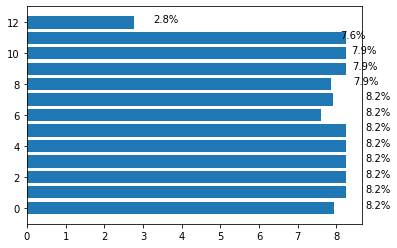

In [71]:
plot_category(df,'Activity')

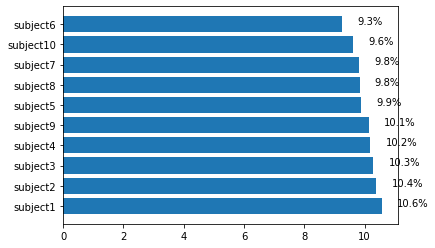

In [72]:
plot_category(df,'subject')

#EDA of 1 subject data

In [73]:
subject1 = df[df['subject']=='subject1']
subject1.Activity.value_counts()

0     4243
8     3379
11    3072
10    3072
9     3072
7     3072
6     3072
5     3072
4     3072
3     3072
2     3072
1     3072
12    1075
Name: Activity, dtype: int64

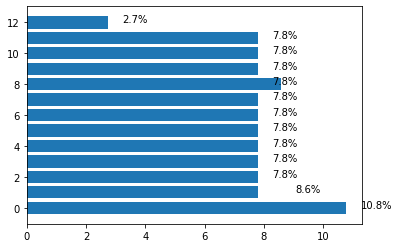

In [74]:
plot_category(subject1,'Activity')

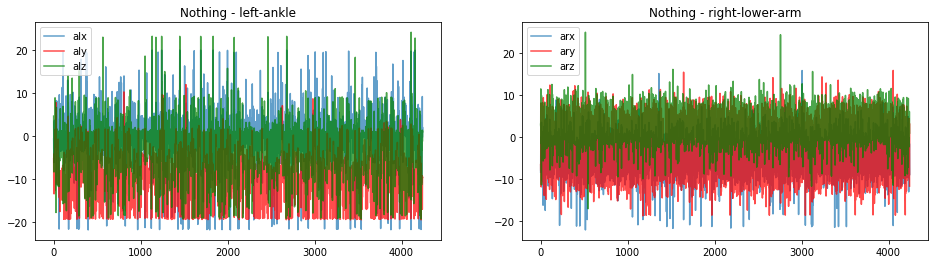

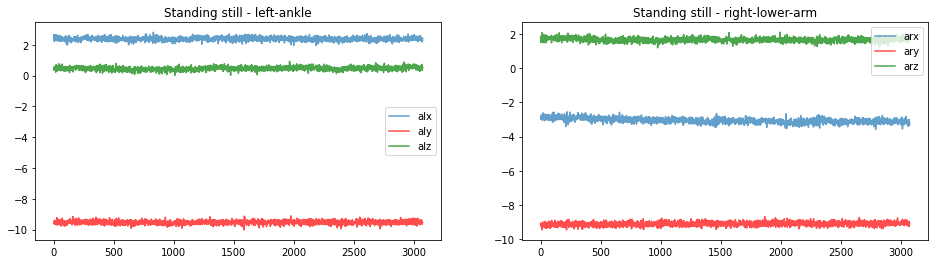

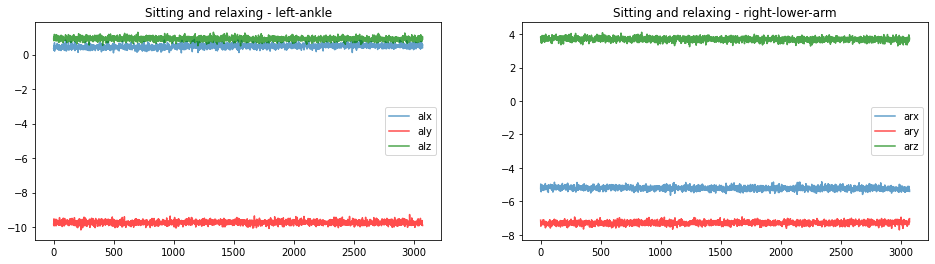

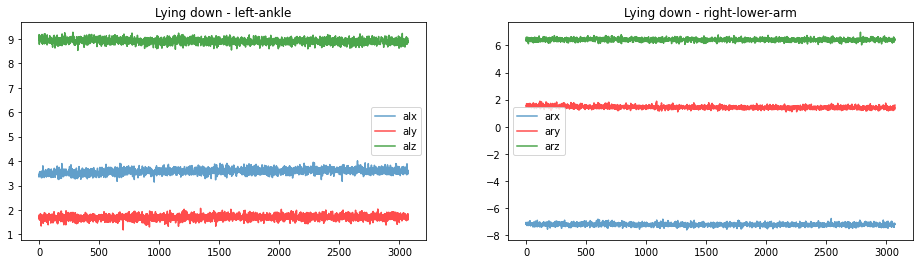

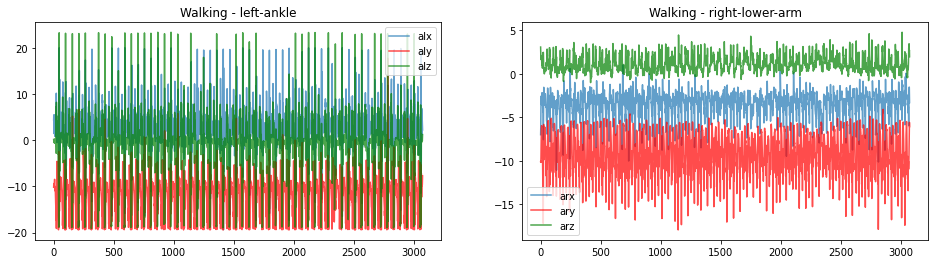

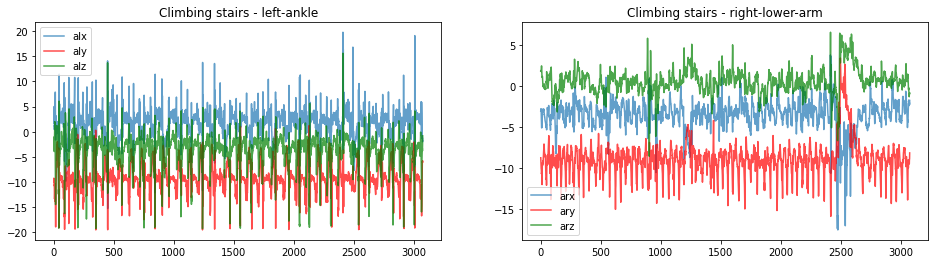

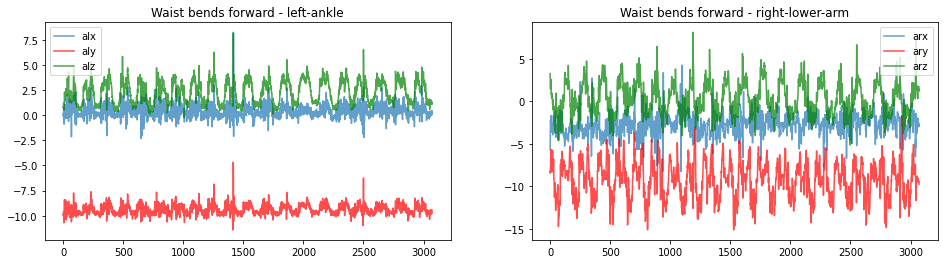

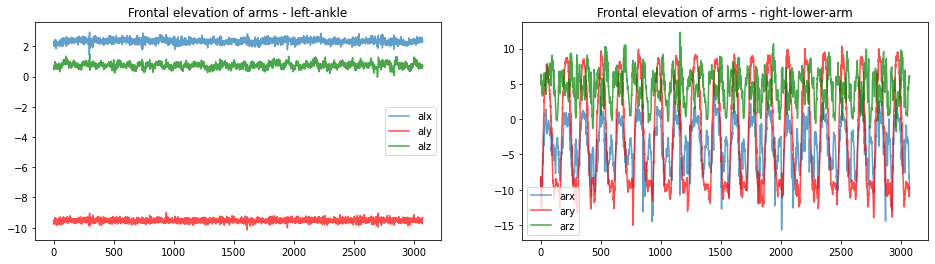

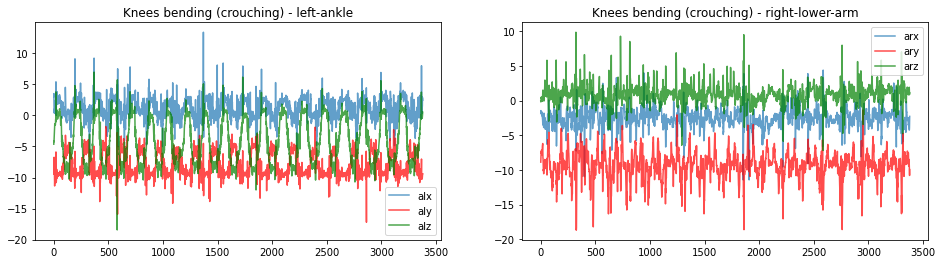

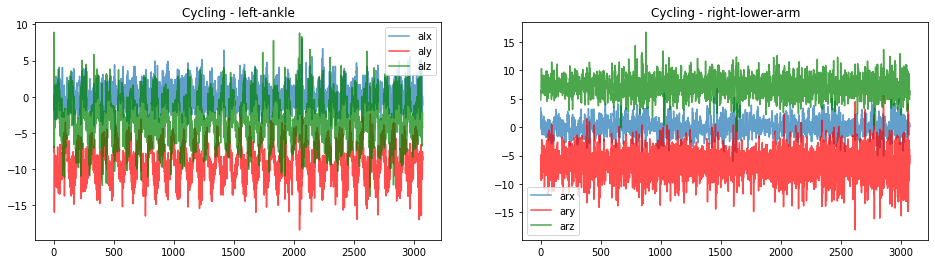

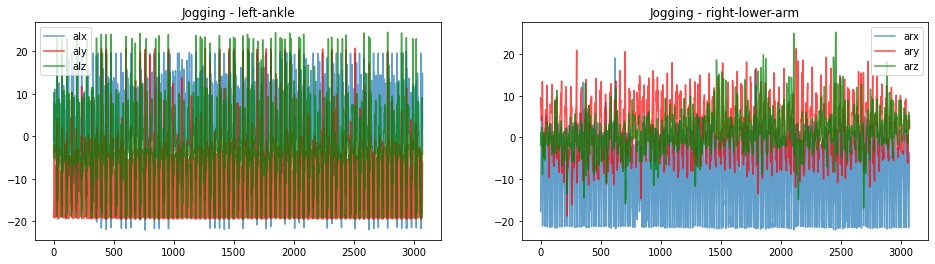

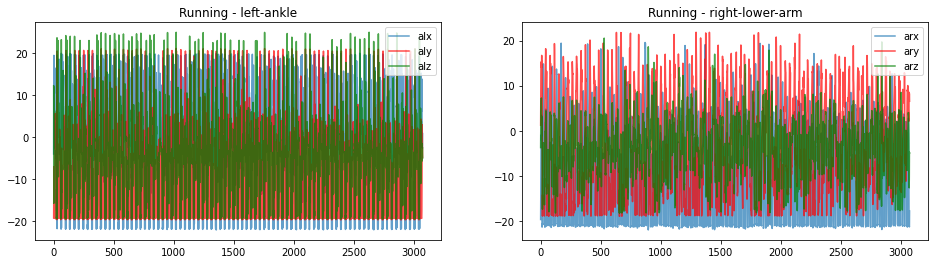

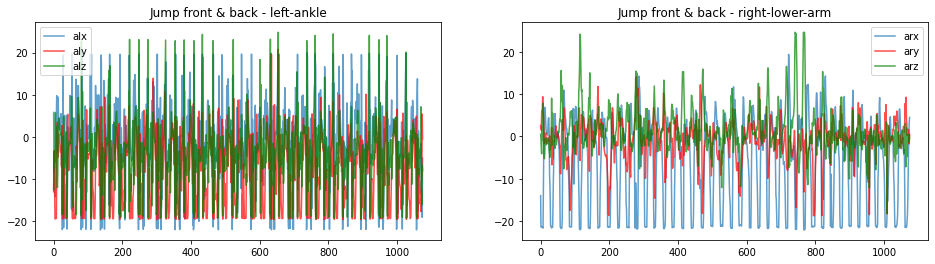

In [75]:
plot_comparison(subject1,'acceleration')

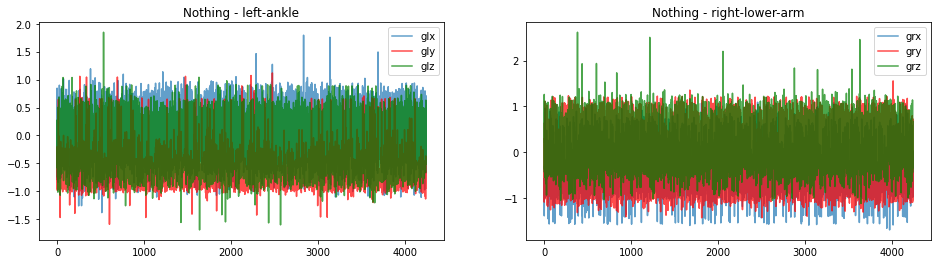

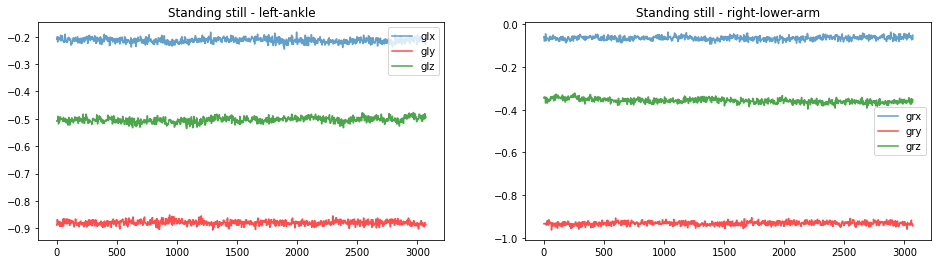

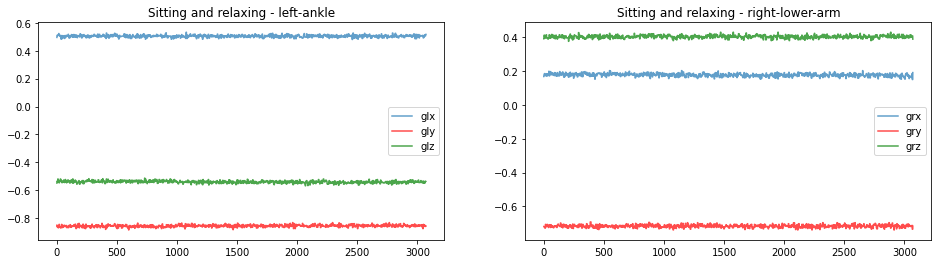

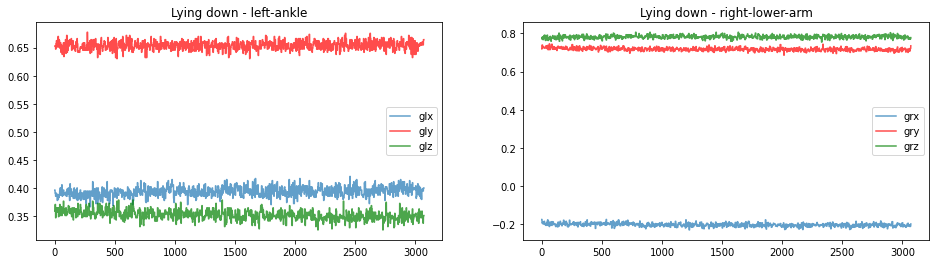

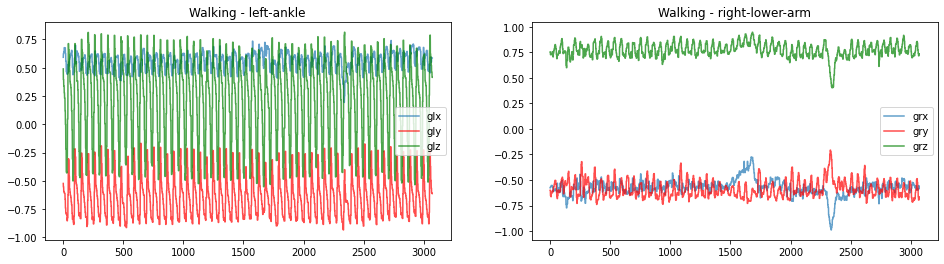

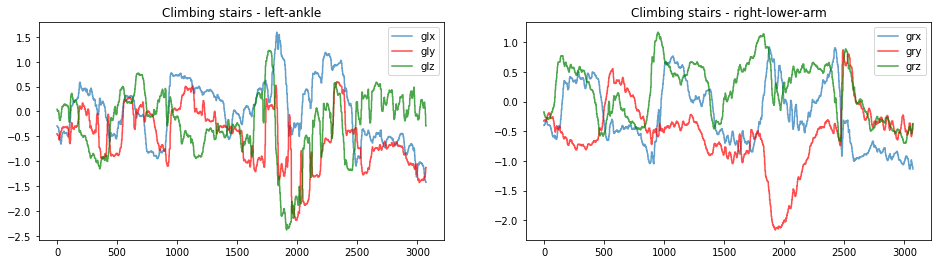

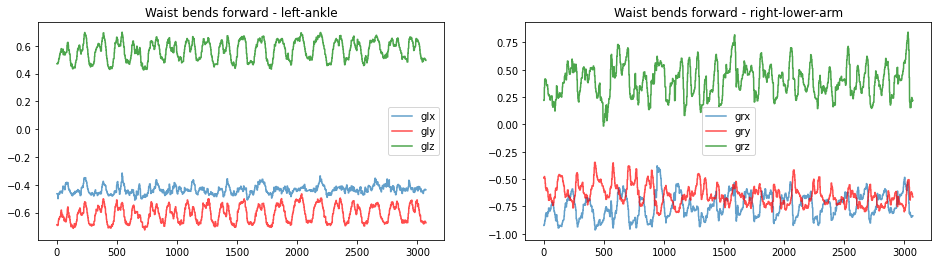

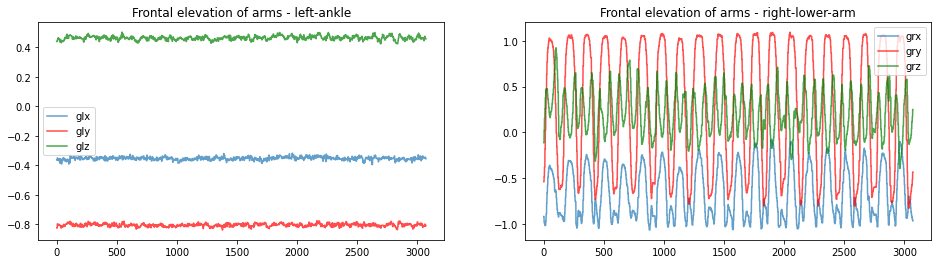

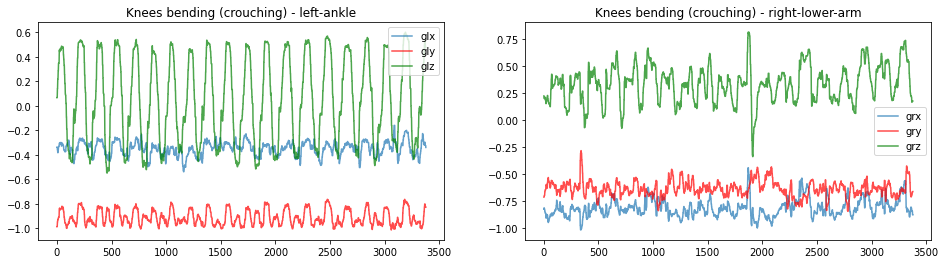

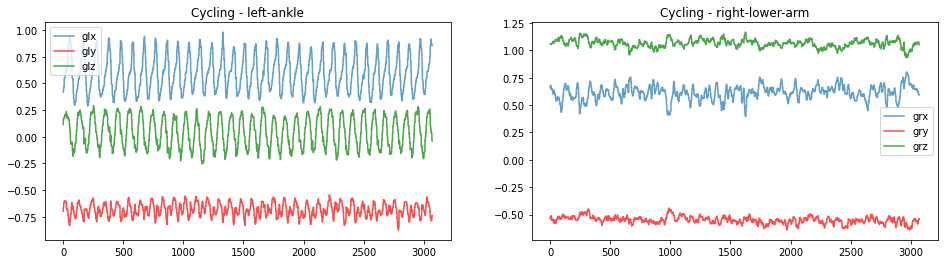

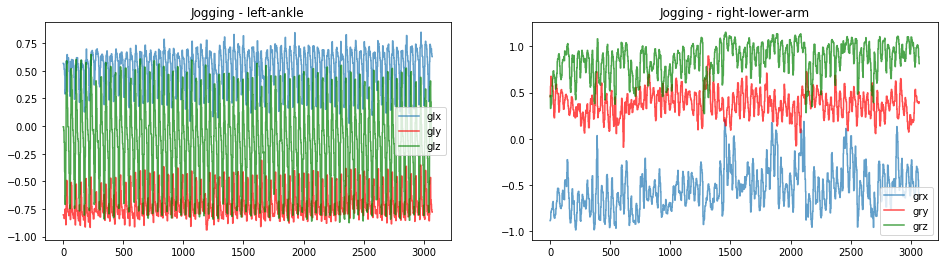

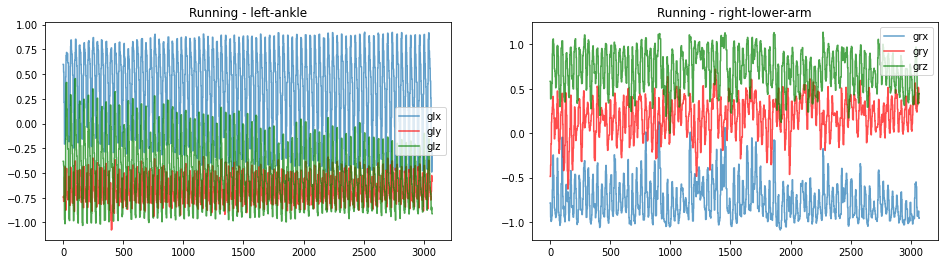

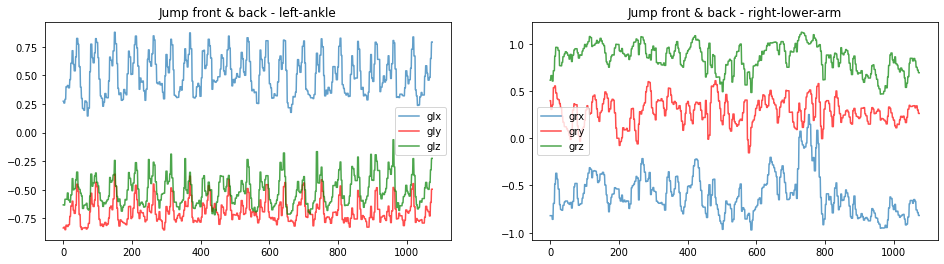

In [76]:
plot_comparison(subject1,'gyroscope')

# EDA of Full Dataset

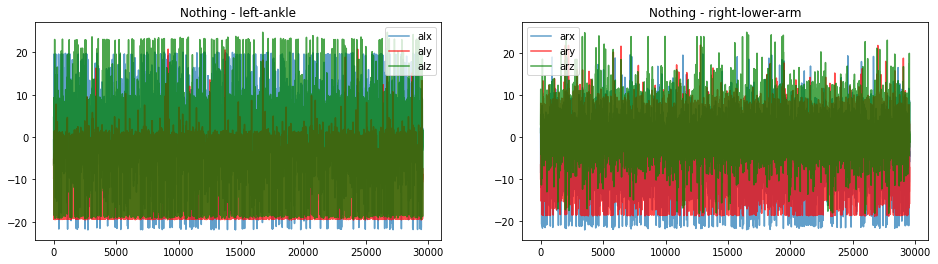

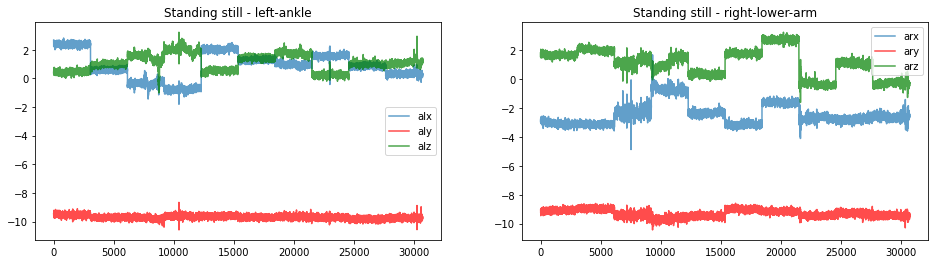

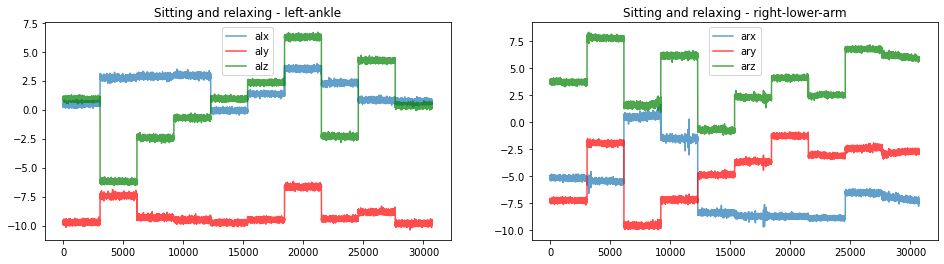

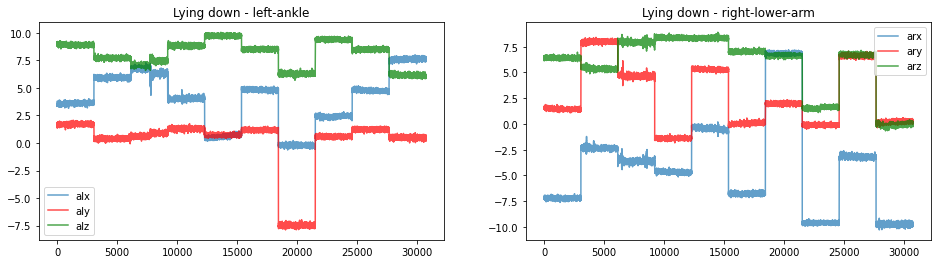

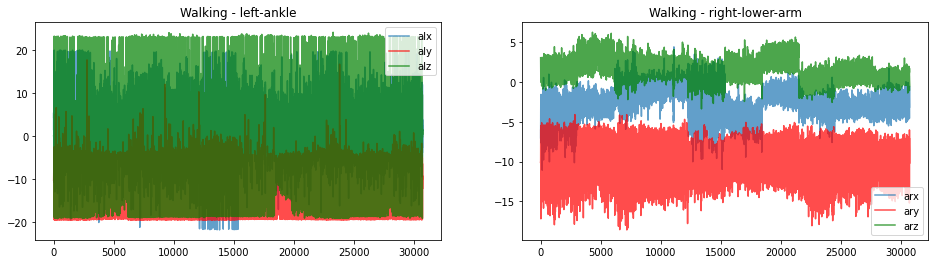

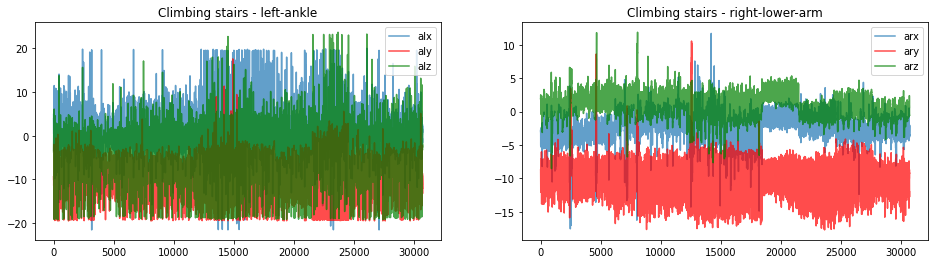

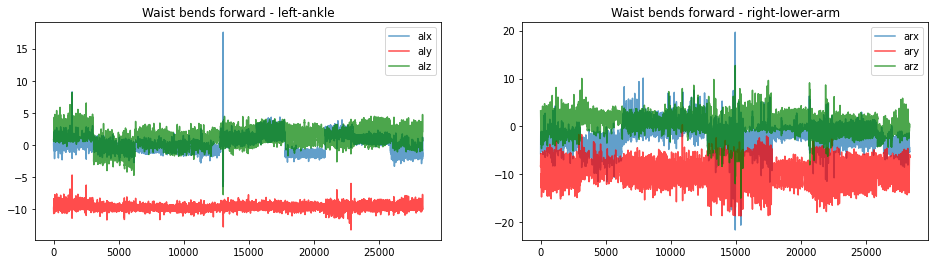

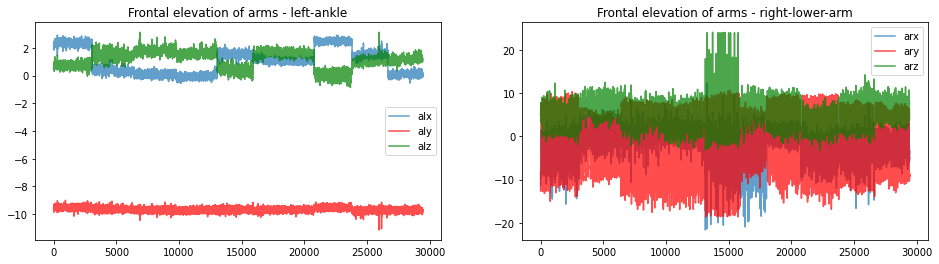

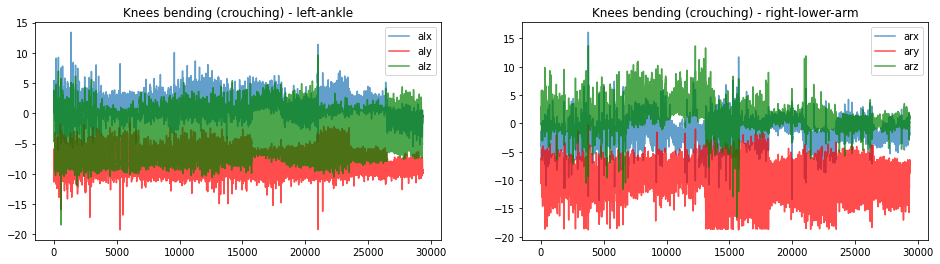

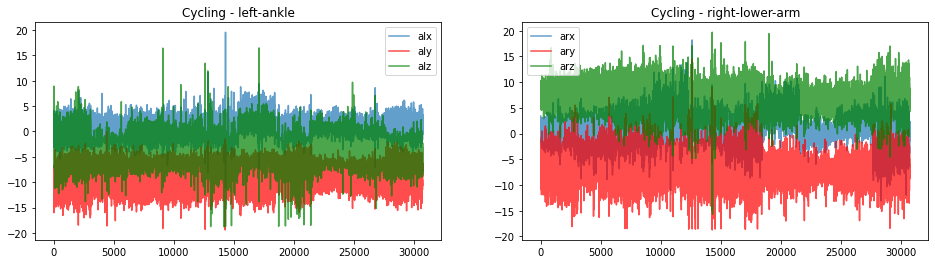

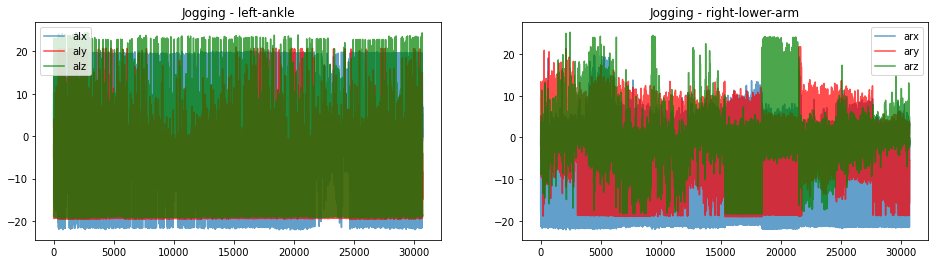

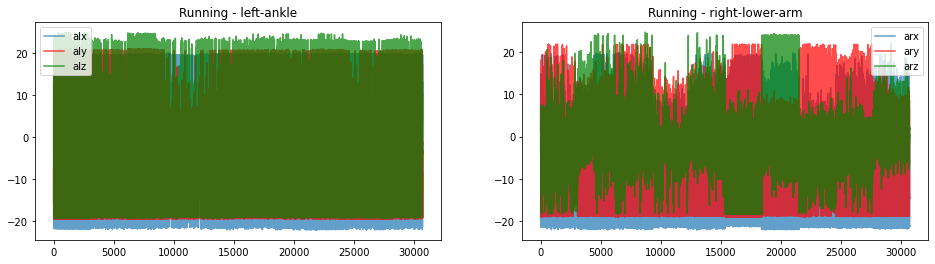

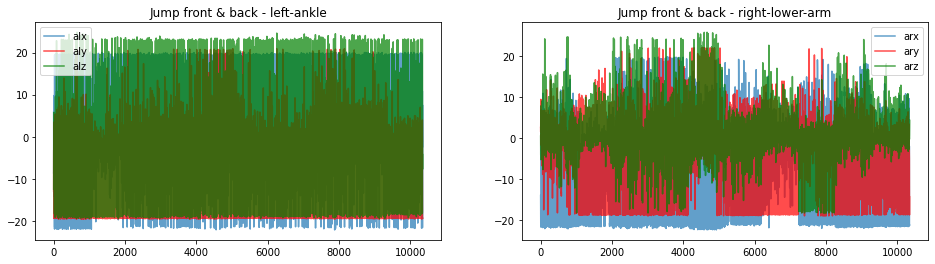

In [77]:
plot_comparison(df)

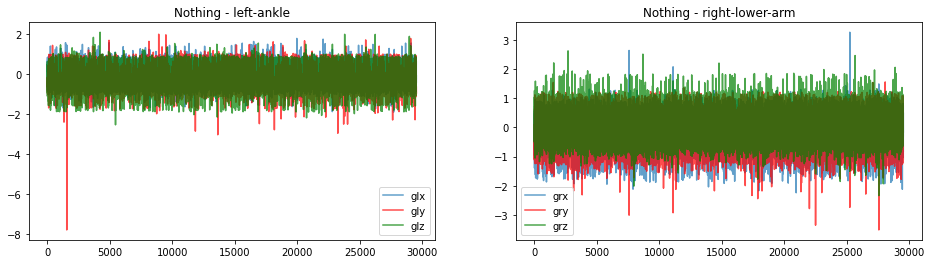

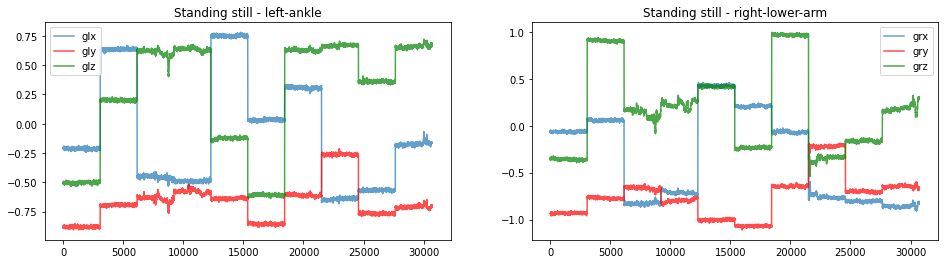

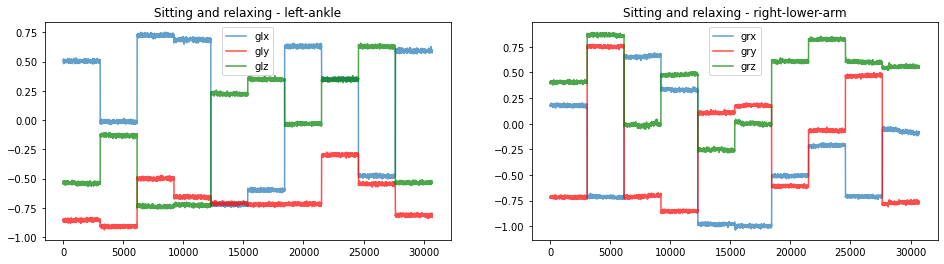

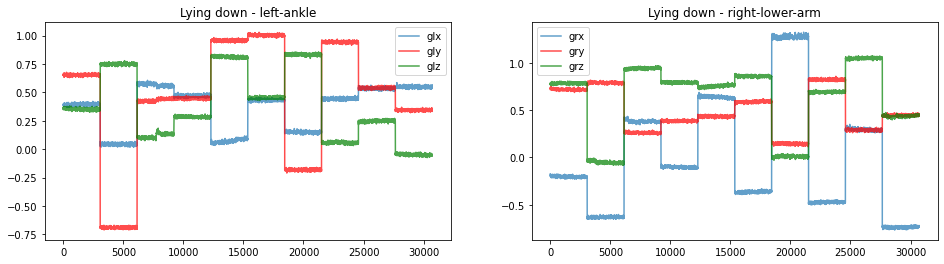

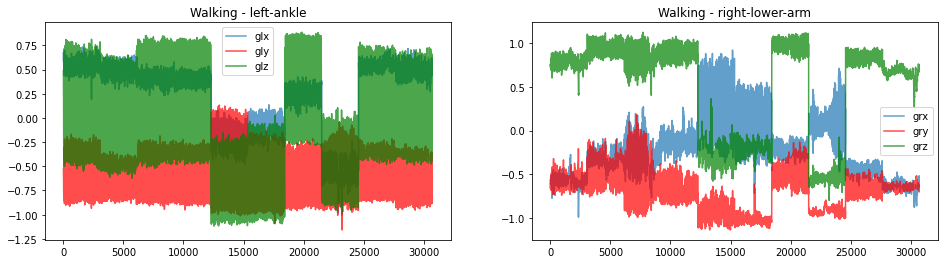

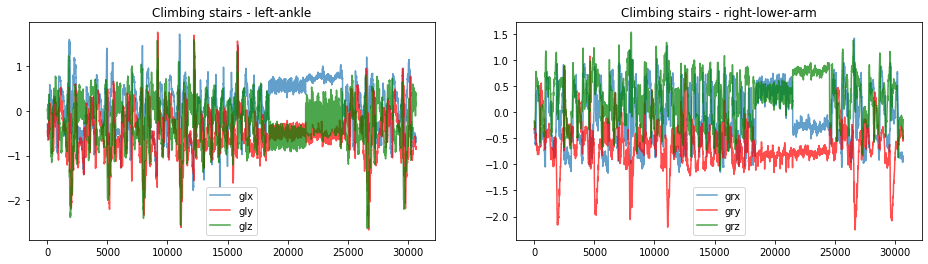

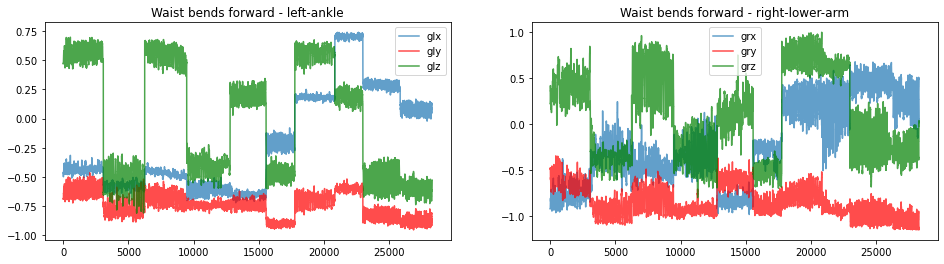

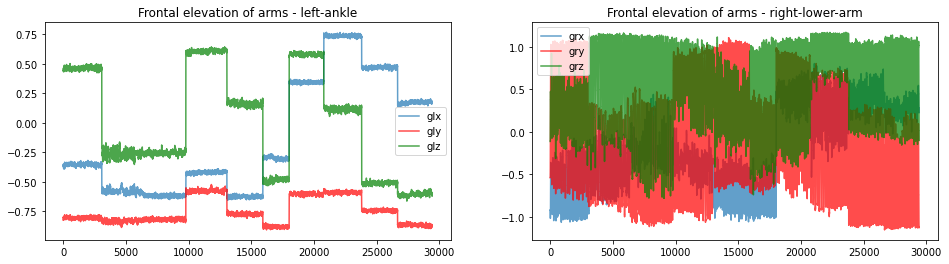

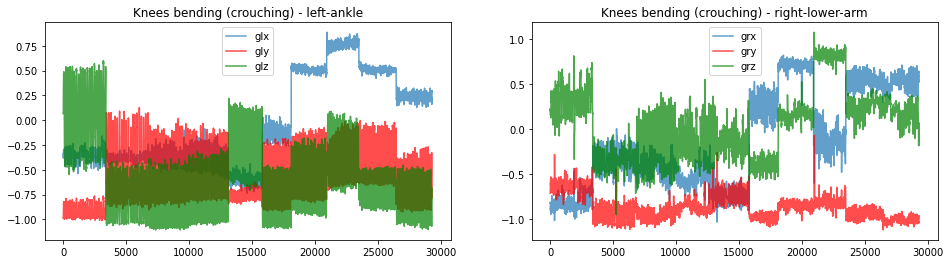

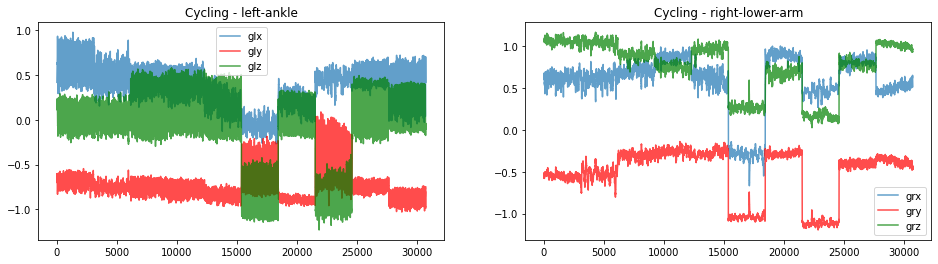

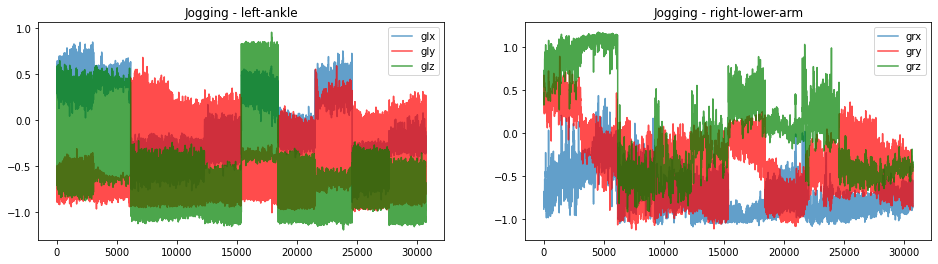

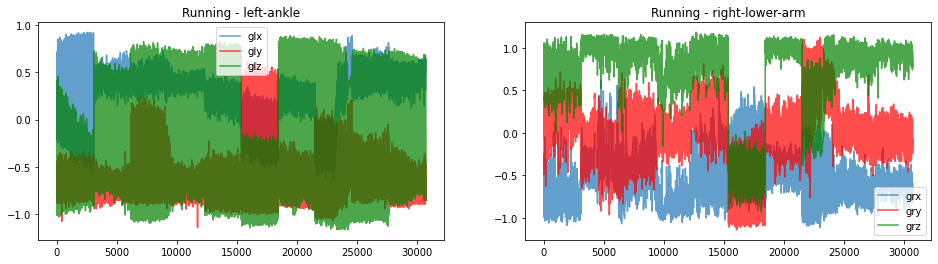

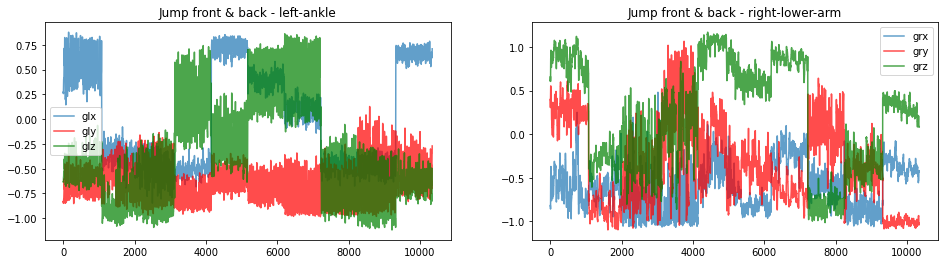

In [78]:
plot_comparison(df,'gyroscope')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 576x432 with 0 Axes>

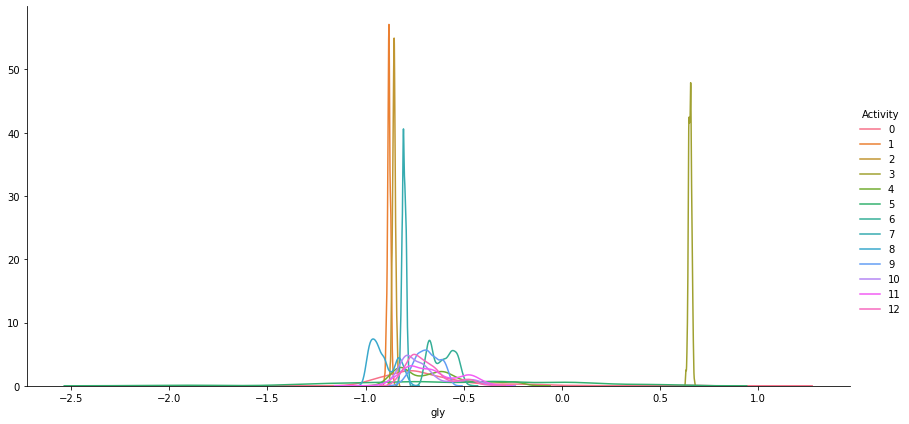

In [79]:
plt.figure(figsize=(8,6))
facetgrid = sns.FacetGrid(subject1, hue='Activity', height=6, aspect=2)
facetgrid.map(sns.distplot,'gly', hist=False).add_legend()
#sns.distplot('gly', hist=False, hue='Activity', data=df)
plt.show()

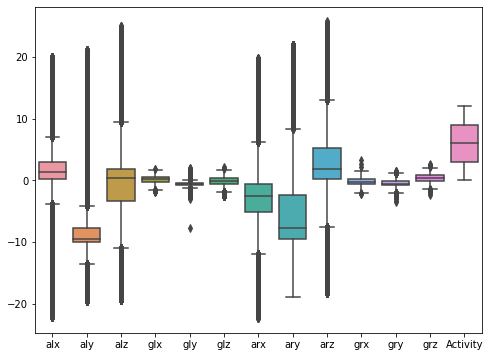

In [80]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

# Data Cleaning

In [81]:
df.describe().T

count      mean       std  ...      50%       75%      max
alx       372735.0  1.770455  4.171677  ...  1.36550  2.883200  20.0440
aly       372735.0 -9.128515  5.100531  ... -9.60640 -7.726200  21.1610
alz       372735.0 -0.726296  6.354113  ...  0.29895  1.759600  25.0150
glx       372735.0  0.090230  0.463354  ...  0.18367  0.484230   1.7941
gly       372735.0 -0.557152  0.427417  ... -0.69043 -0.493430   2.0038
glz       372735.0 -0.125316  0.554999  ... -0.11002  0.349710   2.1022
arx       372735.0 -3.478782  5.778589  ... -2.53390 -0.602910  19.8010
ary       372735.0 -5.783884  6.492916  ... -7.71190 -2.373100  21.9650
arz       372735.0  2.383707  4.147354  ...  1.83100  5.287100  25.7410
grx       372735.0 -0.209434  0.547686  ... -0.30784  0.252940   3.2588
gry       372735.0 -0.416523  0.547813  ... -0.59959 -0.053388   1.5565
grz       372735.0  0.368450  0.522235  ...  0.43534  0.834050   2.6207
Activity  372735.0  5.680113  3.577336  ...  6.00000  9.000000  12.0000

[13 rows x 8 columns]

In [82]:
df1 = df.copy()

In [83]:
for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.47566 to 19.233659999999976
shape (365279, 14)
aly range: -19.379 to 2.450425999999972
shape (359570, 14)
alz range: -18.95 to 14.188279999999793
shape (355824, 14)
glx range: -0.74212 to 0.80705
shape (348955, 14)
gly range: -1.0675 to 0.9662299999999999
shape (342393, 14)
glz range: -1.1061 to 0.82908
shape (336952, 14)
arx range: -21.491999999999997 to 9.099461999999983
shape (331872, 14)
ary range: -18.694000000000006 to 11.95
shape (325812, 14)
arz range: -10.37732 to 11.822659999999974
shape (323248, 14)
grx range: -1.0196 to 0.95686
shape (319774, 14)
gry range: -1.1417 to 0.90965
shape (314957, 14)
grz range: -0.69828 to 1.125
shape (310552, 14)


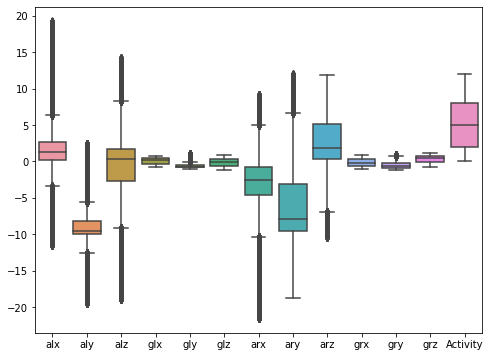

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1)
plt.show()

#Modeling Data Preparation

In [85]:
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

((246210, 14), (64342, 14))

In [86]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((246210, 12), (246210,), (64342, 12), (64342,))

In [87]:
from scipy import stats
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [88]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)
X_train.shape, y_train.shape

((4923, 100, 12), (4923, 1))

In [89]:
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)
X_test.shape, y_test.shape

((1285, 100, 12), (1285, 1))

#Model building

In [90]:
import tensorflow as tf
from keras import layers
import keras

In [91]:
model = keras.Sequential()
model.add(layers.Input(shape=[100,12]))
model.add(layers.Conv1D(filters=32, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Conv1D(filters=64, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPool1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 100, 32)           1184      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 32)           128       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 100, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 100, 64)           6208      
_________________________________________________________________
batch_normalization_3 (Batch (None, 100, 64)           256       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 100, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 64)           

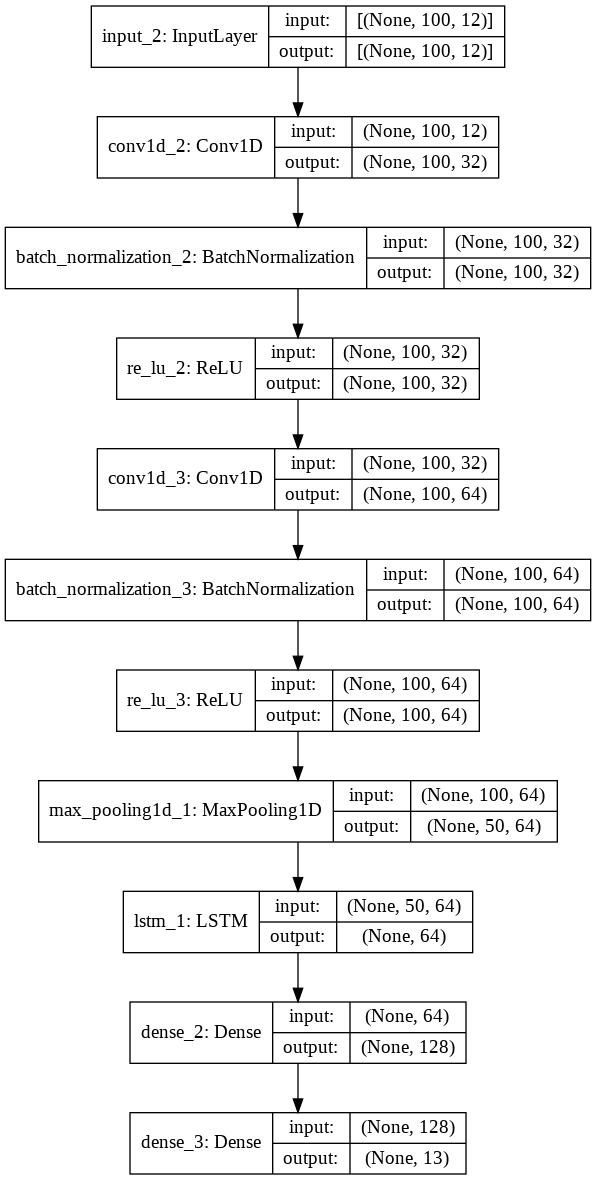

In [92]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [93]:
callbacks = [keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/mHealth/mhealth_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
 
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)
 
model_history = model.fit(X_train,y_train, epochs= 10, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/10
154/154 [==============================] - 3s 9ms/step - loss: 1.3609 - sparse_categorical_accuracy: 0.6001 - val_loss: 2.8292 - val_sparse_categorical_accuracy: 0.3339
Epoch 2/10
154/154 [==============================] - 1s 6ms/step - loss: 0.1617 - sparse_categorical_accuracy: 0.9564 - val_loss: 0.4864 - val_sparse_categorical_accuracy: 0.8498
Epoch 3/10
154/154 [==============================] - 1s 6ms/step - loss: 0.1180 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.3605 - val_sparse_categorical_accuracy: 0.9214
Epoch 4/10
154/154 [==============================] - 1s 6ms/step - loss: 0.0903 - sparse_categorical_accuracy: 0.9705 - val_loss: 0.2532 - val_sparse_categorical_accuracy: 0.8872
Epoch 5/10
154/154 [==============================] - 1s 7ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.2184 - val_sparse_categorical_accuracy: 0.9354
Epoch 6/10
154/154 [==============================] - 1s 7ms/step - loss: 0.0455 - sparse_categorica

In [94]:
model_history.history

{'loss': [0.7350722551345825,
  0.15569326281547546,
  0.12422552704811096,
  0.07984820753335953,
  0.057480715215206146,
  0.04273899272084236,
  0.03800787031650543,
  0.03722824528813362,
  0.036151111125946045,
  0.040911100804805756],
 'sparse_categorical_accuracy': [0.7836685180664062,
  0.9567337036132812,
  0.9609993696212769,
  0.9754214882850647,
  0.982937216758728,
  0.9882185459136963,
  0.9884216785430908,
  0.9882185459136963,
  0.989640474319458,
  0.9878122806549072],
 'val_loss': [2.8292348384857178,
  0.4863671064376831,
  0.3605369031429291,
  0.25322312116622925,
  0.21835722029209137,
  0.07187660783529282,
  0.27893760800361633,
  0.08426898717880249,
  0.06550879031419754,
  0.3459441065788269],
 'val_sparse_categorical_accuracy': [0.3338521420955658,
  0.849805474281311,
  0.921400785446167,
  0.887159526348114,
  0.9354085326194763,
  0.9898832440376282,
  0.9408560395240784,
  0.9859921932220459,
  0.9750972986221313,
  0.8972762823104858]}

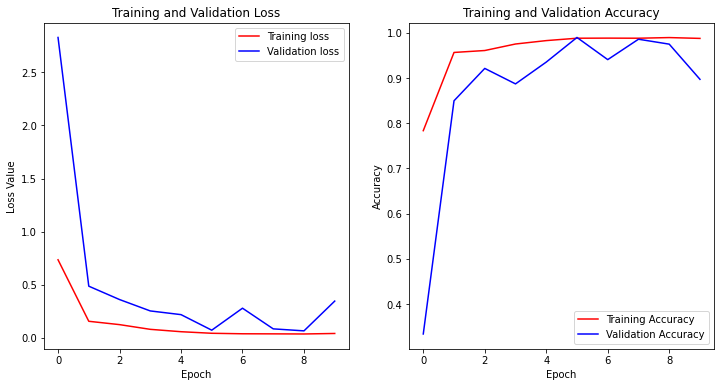

In [95]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [96]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/mHealth/mhealth_best.h5")

train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

41/41 [==============================] - 0s 3ms/step - loss: 0.0655 - sparse_categorical_accuracy: 0.9751
Train accuracy 99.78 %
Train loss 0.00985475443303585
Test accuracy 97.51 %
Test loss 0.06550879031419754


In [97]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

In [98]:
pred.shape,y_test.shape

((1285, 1), (1285, 1))

In [99]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test,pred))
print('*'*50)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      0.99      1.00       124
           2       0.99      1.00      1.00       122
           3       1.00      0.78      0.88       124
           4       1.00      0.98      0.99       120
           5       0.97      1.00      0.98        84
           6       1.00      1.00      1.00       104
           7       1.00      1.00      1.00       112
           8       0.99      0.99      0.99       117
           9       0.99      1.00      1.00       121
          10       1.00      1.00      1.00        89
          11       0.98      1.00      0.99        51
          12       0.51      0.96      0.67        27

    accuracy                           0.98      1285
   macro avg       0.96      0.98      0.96      1285
weighted avg       0.98      0.98      0.98      1285

**************************************************
[[ 90   0   0   0   0   0   

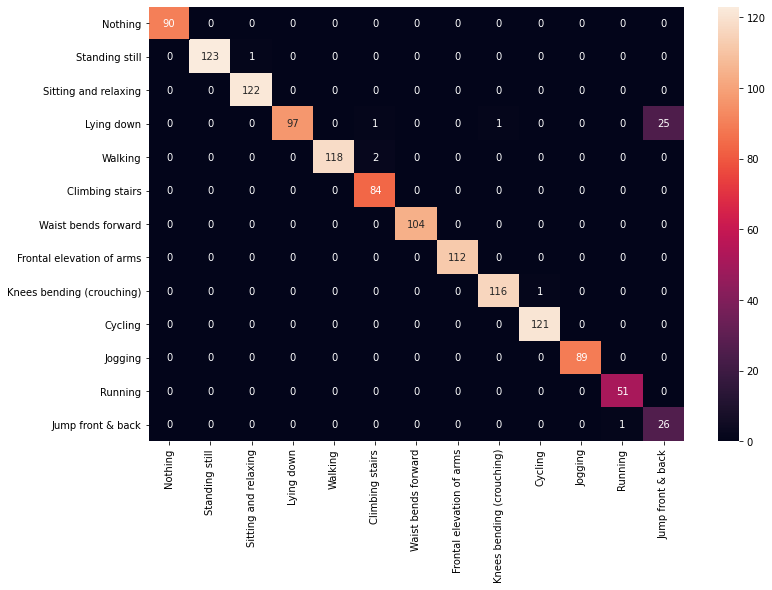

In [100]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()

#new